In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import datetime

# Study data files
bitcoin_path = "Resources/coin_Bitcoin.csv"
ethereum_path = "Resources/coin_Ethereum.csv"
cardano_path = "Resources/coin_Cardano.csv"
dogecoin_path = "Resources/coin_Dogecoin.csv"
polkadot_path = "Resources/coin_Polkadot.csv"

# Read the crypto history data and form dataframes
bitcoinData = pd.read_csv(bitcoin_path)
ethereumData = pd.read_csv(ethereum_path)
cardanoData = pd.read_csv(cardano_path)
dogecoinData = pd.read_csv(dogecoin_path)
polkadotData = pd.read_csv(polkadot_path)

bitData_df = pd.DataFrame(bitcoinData)
ethData_df = pd.DataFrame(ethereumData)
anaData_df = pd.DataFrame(cardanoData)
dogeData_df = pd.DataFrame(dogecoinData)
dotData_df = pd.DataFrame(polkadotData)



<ipython-input-159-01157f631ce8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shortBitData_df["Marketcap(billions)"] = shortBitData_df["Marketcap"]/1000000000
<ipython-input-159-01157f631ce8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shortBitData_df["Volume(billions)"] = shortBitData_df["Volume"]/1000000000


<AxesSubplot:xlabel='Year,month'>

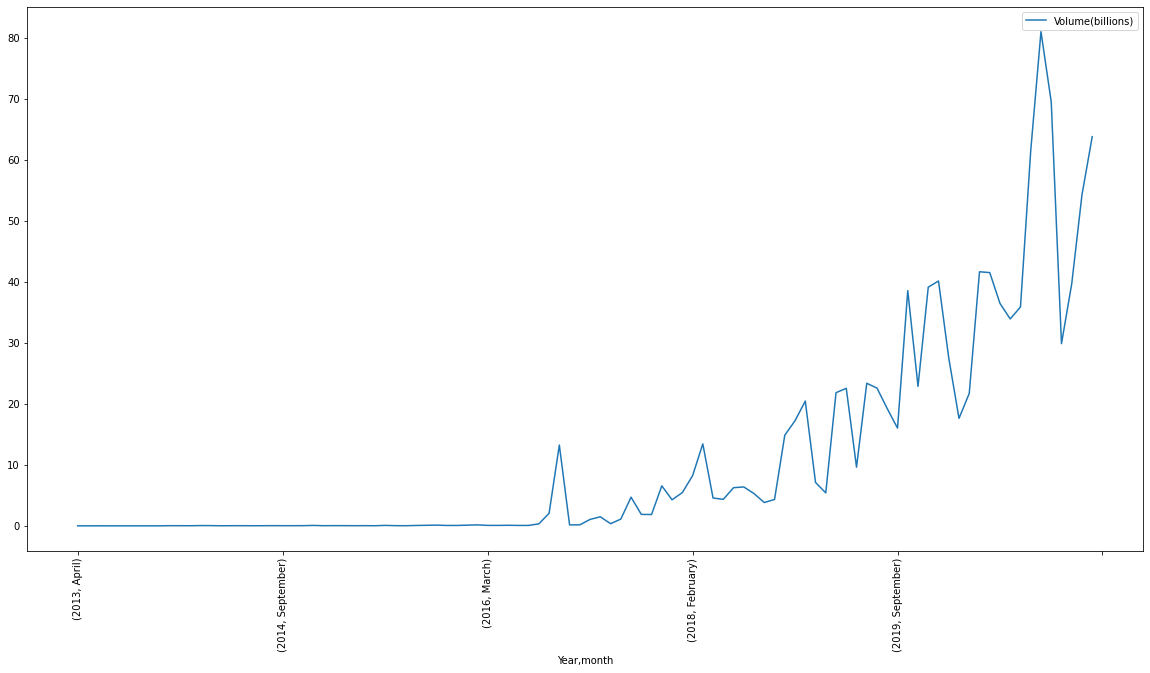

In [159]:
# Creating bitcoin short dataset
bitData_df["Date"] = pd.to_datetime(bitData_df["Date"], format="%Y-%m-%d %H:%M:%S")
bitData_df["month"] = bitData_df["Date"].dt.month_name()
bitData_df["Year"] = bitData_df["Date"].dt.year
bitData_df["month#"] = bitData_df["Date"].dt.month
shortBitData_df = bitData_df[["Name","Year","month#","month","Volume","Marketcap"]]
shortBitData_df["Marketcap(billions)"] = shortBitData_df["Marketcap"]/1000000000
shortBitData_df["Volume(billions)"] = shortBitData_df["Volume"]/1000000000
bitVolume = shortBitData_df[["Year","month","Volume(billions)"]]
bitVolume.groupby(["Year","month"]).mean().plot(figsize=(20,10),rot=90)
# bitVolume.groupby("Year").mean().plot()

In [ ]:
# Creating Ethereum short dataset
ethData_df["Date"] = pd.to_datetime(ethData_df["Date"], format="%Y-%m-%d %H:%M:%S")
ethData_df["month"] = ethData_df["Date"].dt.month_name()
ethData_df["Year"] = ethData_df["Date"].dt.year
ethData_df["month#"] = ethData_df["Date"].dt.month
shortEthData_df = ethData_df[["Name","Year","month#","month","Volume","Marketcap"]]
ethData_df["Marketcap(billions)"] = ethData_df["Marketcap"]/1000000000
ethData_df["Volume(billions)"] = ethData_df["Volume"]/1000000000
ethData_df.tail(50)

In [42]:
# Creating Cardano short dataset
anaData_df["Date"] = pd.to_datetime(anaData_df["Date"], format="%Y-%m-%d %H:%M:%S")
anaData_df["month"] = anaData_df["Date"].dt.month_name()
anaData_df["Year"] = anaData_df["Date"].dt.year
anaData_df["month#"] = anaData_df["Date"].dt.month
shortCarData_df = anaData_df[["Name","Year","month#","month","Volume","Marketcap"]]
shortCarData_df.head()

,Name,Year,month#,month,Volume,Marketcap
0,Cardano,2017,10,October,57641300.0,6.288991e+08
1,Cardano,2017,10,October,16997800.0,5.396927e+08
2,Cardano,2017,10,October,9000050.0,5.686195e+08
3,Cardano,2017,10,October,5562510.0,5.571390e+08
4,Cardano,2017,10,October,7780710.0,4.806646e+08


In [43]:
# Creating Dogecoin short dataset
dogeData_df["Date"] = pd.to_datetime(dogeData_df["Date"], format="%Y-%m-%d %H:%M:%S")
dogeData_df["month"] = dogeData_df["Date"].dt.month_name()
dogeData_df["Year"] = dogeData_df["Date"].dt.year
dogeData_df["month#"] = dogeData_df["Date"].dt.month
shortDogData_df = dogeData_df[["Name","Year","month#","month","Volume","Marketcap"]]
shortDogData_df.head()

,Name,Year,month#,month,Volume,Marketcap
0,Dogecoin,2013,12,December,0.0,1.509085e+06
1,Dogecoin,2013,12,December,0.0,2.169688e+06
2,Dogecoin,2013,12,December,0.0,3.188943e+06
3,Dogecoin,2013,12,December,0.0,1.115034e+07
4,Dogecoin,2013,12,December,0.0,7.284337e+06


In [44]:
# Creating Polkadot short dataset
dotData_df["Date"] = pd.to_datetime(dotData_df["Date"], format="%Y-%m-%d %H:%M:%S")
dotData_df["month"] = dotData_df["Date"].dt.month_name()
dotData_df["Year"] = dotData_df["Date"].dt.year
dotData_df["month#"] = dotData_df["Date"].dt.month
shortPolData_df = dotData_df[["Name","Year","month#","month","Volume","Marketcap"]]
shortPolData_df.head()

,Name,Year,month#,month,Volume,Marketcap
0,Polkadot,2020,8,August,4.931314e+07,0.0
1,Polkadot,2020,8,August,4.858011e+08,0.0
2,Polkadot,2020,8,August,3.207495e+08,0.0
3,Polkadot,2020,8,August,4.076902e+08,0.0
4,Polkadot,2020,8,August,8.988475e+08,0.0


In [113]:
# Create complete list for coins volumes and marketcaps
allCoins_df = pd.concat([shortBitData_df, shortEthData_df,shortCarData_df,shortDogData_df,shortPolData_df])
cleanedCoins_df= allCoins_df.groupby(["Year","month#","month","Name"]).mean().reset_index()
ccVolumes_df = cleanedCoins_df[["Year","month","month#","Name","Volume"]]
ccMarketcap_df = cleanedCoins_df[["Year","month","month#","Name","Marketcap"]]
ccMarketcap_df

,Year,month,month#,Name,Marketcap
0,2013,April,4,Bitcoin,1.573291e+09
1,2013,May,5,Bitcoin,1.339718e+09
2,2013,June,6,Bitcoin,1.216792e+09
3,2013,July,7,Bitcoin,1.034233e+09
4,2013,August,8,Bitcoin,1.317466e+09
...,...,...,...,...,...
317,2021,July,7,Bitcoin,6.418167e+11
318,2021,July,7,Cardano,4.482059e+10
319,2021,July,7,Dogecoin,3.146011e+10
320,2021,July,7,Ethereum,2.590378e+11


In [167]:
# ccVolumes_df["Volume(Billions)"] = ccVolumes_df["Volume"]/1000000000
# test = ccVolumes_df[["Year", "Volume(Billions)"]].groupby("Year").mean()
allCoins_df
# test = allCoins_df.groupby("Year").mean()
# test.plot(figsize=(20,10),rot=90)

,Name,Year,month#,month,Volume,Marketcap
0,Bitcoin,2013,4,April,0.000000e+00,1.603769e+09
1,Bitcoin,2013,4,April,0.000000e+00,1.542813e+09
2,Bitcoin,2013,5,May,0.000000e+00,1.298955e+09
3,Bitcoin,2013,5,May,0.000000e+00,1.168517e+09
4,Bitcoin,2013,5,May,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...
315,Polkadot,2021,7,July,7.531948e+08,1.468349e+10
316,Polkadot,2021,7,July,7.112351e+08,1.489035e+10
317,Polkadot,2021,7,July,7.520759e+08,1.533547e+10
318,Polkadot,2021,7,July,8.448446e+08,1.459323e+10


In [ ]:
#NOTES
# bitData_df.set_index(["Date"]).loc["2015"]
# bitData_df.loc["2015":"2019"]